12 steps to Navier-Stokes
=====
***

Did you experiment in Steps 1 and 2](sing different parameter choices? If you did, you probably ran into some unexpected behavior. Did your solution ever blow up? (In my experience, CFD students *love* to make things blow up.)

You are probably wondering why changing the discretization parameters affects your solution in such a drastic way. This notebook complements our [interactive CFD lessons](https://bitbucket.org/cfdpython/cfd-python-class/overview) by discussing the CFL condition. And learn more by watching Prof. Barba's YouTube lectures (links below). 

Convergence and the CFL Condition
----
***

In [2]:
using PyPlot
function linearconv(nx)
    #nx = 41 ; # try changing this number from 41 to 81 and Run All ... what happens?
    dx = 2/(nx-1);
    nt = 25 ;   #nt is the number of timesteps we want to calculate
    dt = .025 ; #dt is the amount of time each timestep covers (delta t)
    c = 1;      #assume wavespeed of c = 1
    u = ones(nx);    # function ones()
    s=Int(0.5/dx);e=Int(1/dx);
    u[s:e]= 2;
    un = ones(nx); #initialize a temporary array
    for n in 1:nt #loop for values of n from 0 to nt, so it will run nt times
        un = copy(u) ##copy the existing values of u into un
        for i in 2:nx ## you can try commenting this line and...
            u[i] = un[i]-c*dt/dx*(un[i]-un[i-1]);
        end
    end
    plot(linspace(0,2,nx),u);    
end


linearconv (generic function with 1 method)

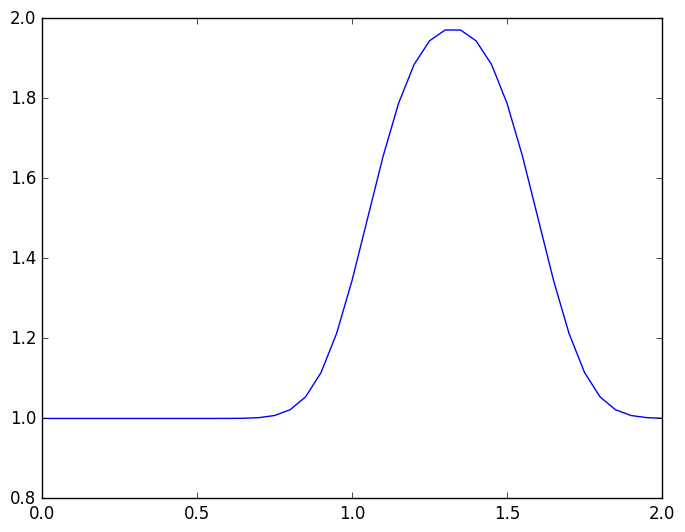

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff582a7588>

In [3]:
linearconv(41) #convection using 41 grid points

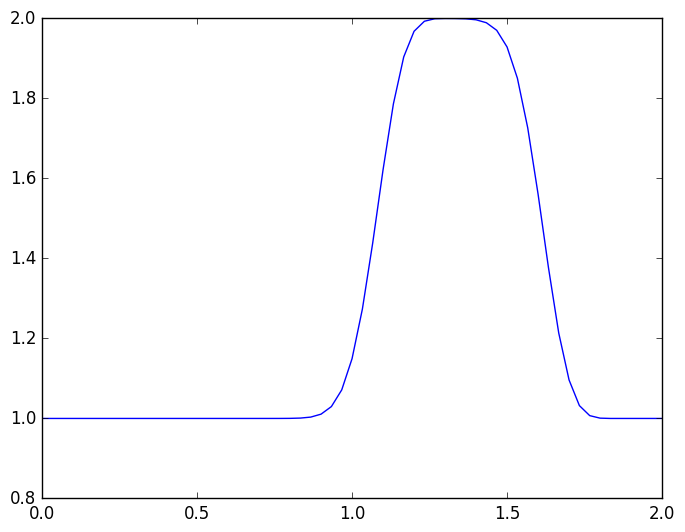

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff581ba4a8>

In [4]:
linearconv(61)

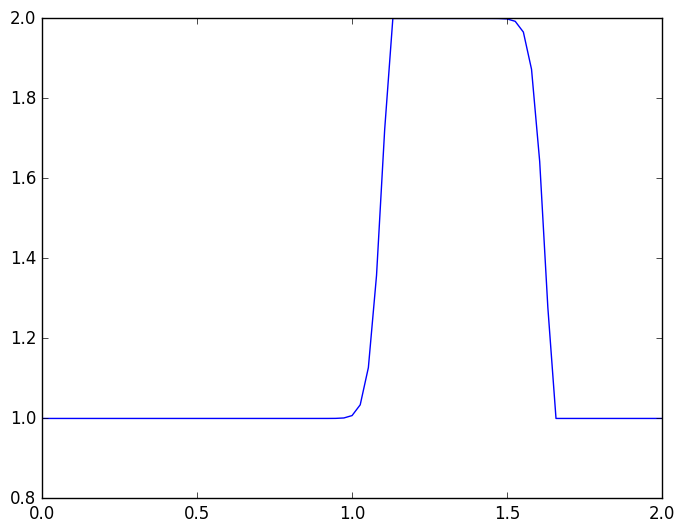

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff57f84c18>

In [23]:
linearconv(77) # for some reason nx = 71 does not produce result

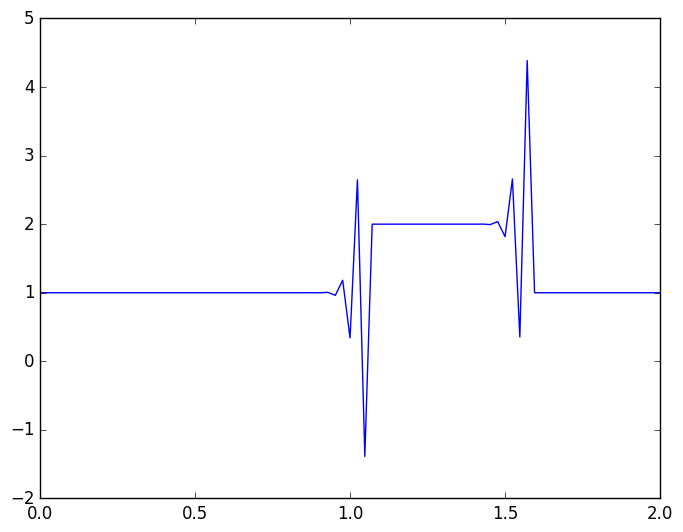

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff58106eb8>

In [9]:
linearconv(85)

This doesn't look anything like our original hat function. 

### What happened?

To answer that question, we have to think a little bit about what we're actually implementing in code.  

In each iteration of our time loop, we use the existing data about our wave to estimate the speed of the wave in the subsequent time step.  Initially, the increase in the number of grid points returned more accurate answers.  There was less numerical diffusion and the square wave looked much more like a square wave than it did in our first example.  

Each iteration of our time loop covers a time-step of length $\Delta t$, which we have been defining as 0.025

During this iteration, we evaluate the speed of the wave at each of the $x$ points we've created.  In the last plot, something has clearly gone wrong.  

What has happened is that over the time period $\Delta t$, the wave is travelling a distance which is greater than `dx`.  The length `dx` of each grid box is related to the number of total points `nx`, so stability can be enforced if the $\Delta t$ step size is calculated with respect to the size of `dx`.  

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{max}$$

where $u$ is the speed of the wave; $\sigma$ is called the **Courant number** and the value of $\sigma_{max}$ that will ensure stability depends on the discretization used. 

In a new version of our code, we'll use the CFL number to calculate the appropriate time-step `dt` depending on the size of `dx`.  



In [25]:
using PyPlot
function linearconv2(nx)
    #nx = 41 ; # try changing this number from 41 to 81 and Run All ... what happens?
    dx = 2/(nx-1);
    siamg = 0.5;
    nt = 25 ;   #nt is the number of timesteps we want to calculate
    dt = siamg*dx ; #dt is the amount of time each timestep covers (delta t)
    c = 1;      #assume wavespeed of c = 1
    u = ones(nx);    # function ones()
    s=Int(0.5/dx);e=Int(1/dx);
    u[s:e]= 2;
    un = ones(nx); #initialize a temporary array
    for n in 1:nt #loop for values of n from 0 to nt, so it will run nt times
        un = copy(u) ##copy the existing values of u into un
        for i in 2:nx ## you can try commenting this line and...
            u[i] = un[i]-c*dt/dx*(un[i]-un[i-1]);
        end
    end
    plot(linspace(0,2,nx),u);    
end


linearconv2 (generic function with 1 method)

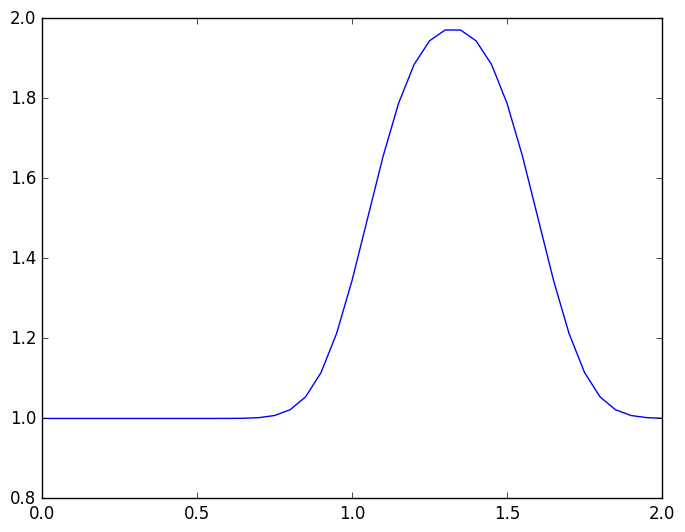

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff57f66860>

In [26]:
linearconv2(41)

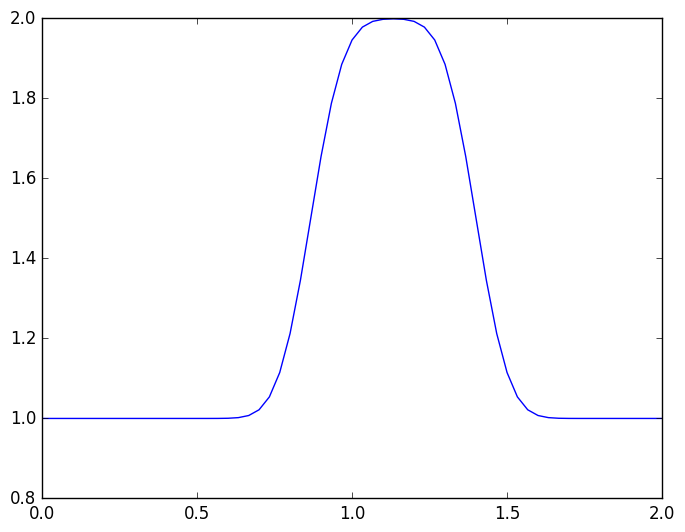

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff57ec9278>

In [27]:
linearconv(61)

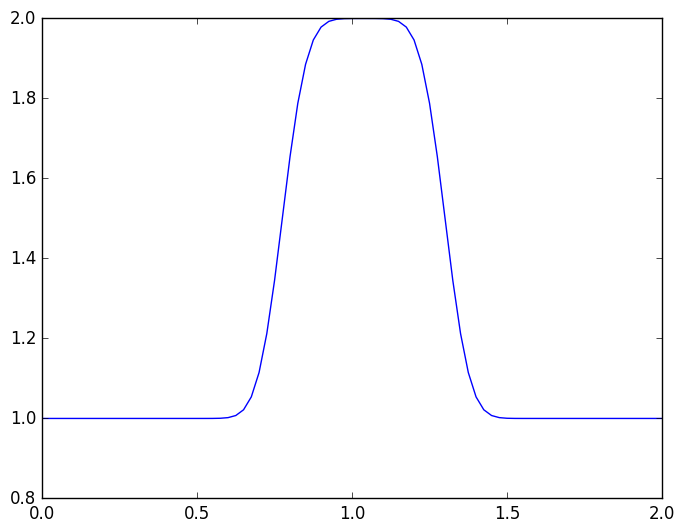

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff57ea2e80>

In [29]:
linearconv(81)

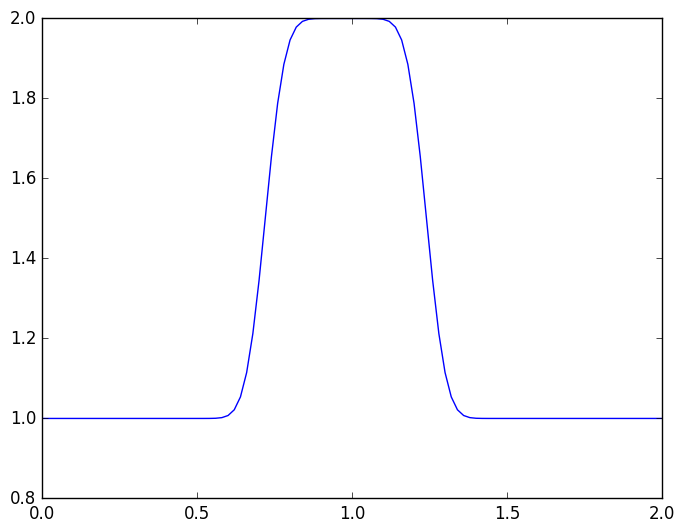

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff57d465f8>

In [32]:
linearconv(101)

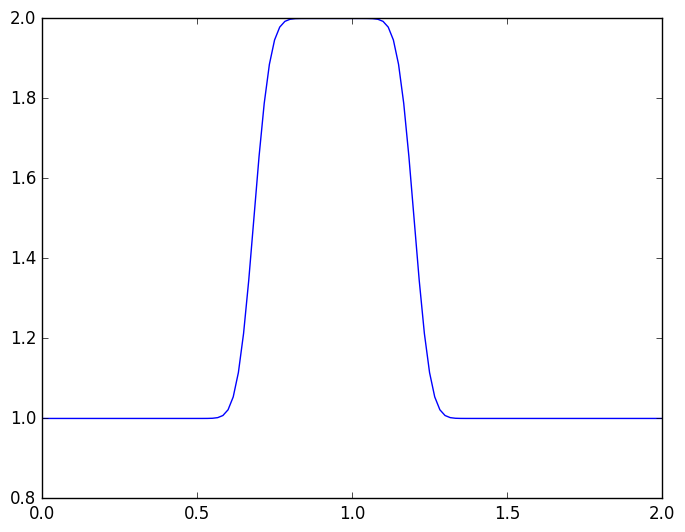

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff57d25fd0>

In [33]:
linearconv(121)

Notice that as the number of points `nx` increases, the wave convects a shorter and shorter distance.  The number of time iterations we have advanced the solution at is held constant at `nt = 20`, but depending on the value of `nx` and the corresponding values of `dx` and `dt`, a shorter time window is being examined overall.  